## Imports



In [ ]:
!pip install sweetviz
!pip install ydata_profiling
!pip install shap

In [ ]:
import pandas as pd
import seaborn as sns
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import random
import chardet
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import sweetviz as sv
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import shap

# Análise estatística ENEM

#### Possíveis perguntas que queremos responder:

- Em quais disciplinas os autistas mais se destacam? Existe uma diferença significativa entre o desempenho destes e outros grupos especiais?

- Sobre a dificuldade de interação e compreensão social, podemos ver isso refletido na redação? Podemos começar usando estatística descritiva. Em seguida, vamos analisar as distribuições e verificar se podemos confirmar algumas hipóteses

- Existe diferenças de desempenho entre portadores de autismo por gênero? Alguns estudos indicam que mulheres possuem mais facilidade para mascarar as dificuldades típicas de uma pessoa com TEA.

## Análise comparativa com alunos autistas e outras deficiências
- Nessa análise, vamos entender alguns dos principais fatores atribuídos ás pessoas portadoras de autismo. Um estudo mostrou que a matéria preferida dos autistas é matemática.
([Link aqui](https://veja.abril.com.br/ciencia/criancas-autistas-tem-melhor-desempenho-em-matematica-do-que-as-outras))

- Outros estudos mostram que as interações sociais e as formas de lidar com outras pessoas é uma das maiores dificuldades para os autistas. Avaliar a competência cinco da prova de redação, que trata justamente de propor intervenções que respeitem os direitos humanos, pode nos dar um norte para "confirmar" a tendência desse estudo.
([Link aqui](https://www.pandorgaformacaoautismo.org/post/por-que-a-intera%C3%A7%C3%A3o-social-%C3%A9-t%C3%A3o-dif%C3%ADcil-para-as-pessoas-autistas))

- Também há na literatura estudos que indicam que mulheres conseguem mascarar melhor as problemáticas oriundas do autismo ([Link aqui](https://autismoerealidade.org.br/2020/07/30/ha-diferencas-entre-homens-e-mulheres-com-autismo/))

### Estrutura
Além da tabela principal, dividimos os dados em 5 tabelas primeiramente, representadas por alunos com alguma disfunção neurológica:
- Tabela com alunos autistas
- Tabela com alunos com dislexias
- Tabela com alunos com déficit de atenção
- Tabela com alunos com discalculia
- Tabela com alunos com dislexia
- Tabela com alunos com deficiência mental

Em seguida, apresentamos também tabelas de proporção entre autistas homens e autistas mulheres.

Todas essas modificações foram feitas na aba de tratamento.py

## Tratamento

In [ ]:
# Criar um dataframe para cada csv

tot_aut = pd.read_csv('alunos_autistas.csv')
tot_def_men = pd.read_csv('tot_def_men.csv')
tot_deficit_atencao = pd.read_csv('tot_deficit_atencao.csv')
tot_discalculia = pd.read_csv('tot_discalculia.csv')
tot_dislexia = pd.read_csv('tot_dislexia.csv')

In [ ]:
# Selecionar colunas para estudo (em chunks)
colunas_selecionadasdf = [
    'IN_AUTISMO',
    'NU_NOTA_CN',
    'NU_NOTA_CH',
    'NU_NOTA_LC',
    'NU_NOTA_MT',
    'NU_NOTA_REDACAO',
    'NU_NOTA_COMP5',
    'TP_SEXO',
    'SG_UF_RESIDENCIA',
    'NU_IDADE',
    'Q001',
    'Q006',
    'Q025',
    'SG_UF_RESIDENCIA',
    'TP_ESCOLA',
    'IN_DEFICIENCIA_MENTAL',
    'IN_DEFICIT_ATENCAO',
    'IN_DISCALCULIA',
    'IN_DISLEXIA']

In [ ]:
# Criar a variável 'NotaEnem'

tot_def_men['NotaEnem'] = (tot_def_men['NU_NOTA_CN'] + tot_def_men['NU_NOTA_CH'] + tot_def_men['NU_NOTA_LC'] + tot_def_men['NU_NOTA_MT'] + tot_def_men['NU_NOTA_REDACAO']) / 5
tot_aut['NotaEnem'] = (tot_aut['NU_NOTA_CN'] + tot_aut['NU_NOTA_CH'] + tot_aut['NU_NOTA_LC'] + tot_aut['NU_NOTA_MT'] + tot_aut['NU_NOTA_REDACAO']) / 5
tot_discalculia['NotaEnem'] = (tot_discalculia['NU_NOTA_CN'] + tot_discalculia['NU_NOTA_CH'] + tot_discalculia['NU_NOTA_LC'] + tot_discalculia['NU_NOTA_MT'] + tot_discalculia['NU_NOTA_REDACAO']) /5
tot_dislexia['NotaEnem'] = (tot_dislexia['NU_NOTA_CN'] + tot_dislexia['NU_NOTA_CH'] + tot_dislexia['NU_NOTA_LC'] + tot_dislexia['NU_NOTA_MT'] + tot_dislexia['NU_NOTA_REDACAO']) /5
tot_deficit_atencao['NotaEnem'] = (tot_deficit_atencao['NU_NOTA_CN'] + tot_deficit_atencao['NU_NOTA_CH'] + tot_deficit_atencao['NU_NOTA_LC'] + tot_deficit_atencao['NU_NOTA_MT'])/5

In [ ]:
tot_def_men.drop(columns=['Unnamed: 0'], inplace=True)
tot_discalculia.drop(columns=['Unnamed: 0'], inplace=True)
tot_dislexia.drop(columns=['Unnamed: 0'], inplace=True)
tot_deficit_atencao.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
# Renomeando algumas colunas (de todos os dataframes)

tot_aut.rename(columns={
    'Q001': 'Escolaridade Pai',
    'Q006': 'Renda',
    'Q025': "Internet"
}, inplace=True)

tot_def_men.rename(columns={
    'Q001': 'Escolaridade Pai',
    'Q006': 'Renda',
    'Q025': "Internet"
}, inplace=True)

tot_deficit_atencao.rename(columns={
    'Q001': 'Escolaridade Pai',
    'Q006': 'Renda',
    'Q025': "Internet"

}, inplace=True)

tot_discalculia.rename(
    columns={
    'Q001': 'Escolaridade Pai',
    'Q006': 'Renda',
    'Q025': "Internet"

}, inplace=True
)

tot_dislexia.rename(
    columns={
    'Q001': 'Escolaridade Pai',
    'Q006': 'Renda',
    'Q025': "Internet"

}, inplace=True
)

In [ ]:
# Substituir alguns valores por nomes mais fáceis

internet = {
    'A': "N",
    'B': "S",
}

 # Substituir os valores na coluna correspondente
tot_aut["Internet"] = tot_aut["Internet"].replace(internet)
tot_def_men["Internet"] = tot_def_men["Internet"].replace(internet)
tot_dislexia['Internet'] = tot_dislexia["Internet"].replace(internet)
tot_deficit_atencao["Internet"] = tot_deficit_atencao["Internet"].replace(internet)
tot_discalculia["Internet"] = tot_discalculia["Internet"].replace(internet)

In [ ]:
dataframes = {
    "tot_aut": tot_aut,
    "tot_def_men": tot_def_men,
    "tot_deficit_atencao": tot_deficit_atencao,
    "tot_discalculia": tot_discalculia,
    "tot_dislexia": tot_dislexia
}

for df_name, df in dataframes.items():
  print(f"DataFrame: {df_name}")
  display(df.head())
  print("\nInfo:")
  display(df.info())
  print("\n---\n")
  print("\n")


DataFrame: tot_aut


,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESCOLA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,NU_NOTA_CN,...,NU_NOTA_REDACAO,Escolaridade Pai,Renda,Internet,NotaEnem,NotaGeralSemMT,Sexo_codificado,Renda_codificada,Escolaridade Pai codificada,Internet codificada
0,SP,19.0,M,1,0,1,0,0,1,443.7,...,440.0,H,D,S,470.78,470.100,1,3,7,1
1,RN,20.0,M,1,0,0,0,0,1,458.6,...,220.0,H,A,N,378.56,371.975,1,0,7,0
2,RN,20.0,M,2,1,0,0,0,1,334.4,...,200.0,H,D,S,352.76,347.775,1,3,7,1
3,ES,24.0,F,1,0,1,0,0,1,544.9,...,740.0,E,I,S,639.06,622.100,0,8,4,1
4,RS,26.0,M,1,0,0,0,0,1,621.2,...,740.0,E,G,S,667.82,659.650,1,6,4,1



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SG_UF_RESIDENCIA             958 non-null    object 
 1   NU_IDADE                     958 non-null    float64
 2   TP_SEXO                      958 non-null    object 
 3   TP_ESCOLA                    958 non-null    int64  
 4   IN_DEFICIENCIA_MENTAL        958 non-null    int64  
 5   IN_DEFICIT_ATENCAO           958 non-null    int64  
 6   IN_DISLEXIA                  958 non-null    int64  
 7   IN_DISCALCULIA               958 non-null    int64  
 8   IN_AUTISMO                   958 non-null    int64  
 9   NU_NOTA_CN                   958 non-null    float64
 10  NU_NOTA_CH                   958 non-null    float64
 11  NU_NOTA_LC                   958 non-null    float64
 12  NU_NOTA_MT                   958 non-null    float64
 13  NU_NOTA_COMP5

None


---



DataFrame: tot_def_men


,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESCOLA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP5,NU_NOTA_REDACAO,Escolaridade Pai,Renda,Internet,NotaEnem
0,RJ,20.0,M,2,1,1,0,1,0,359.0,505.4,430.4,430.3,60.0,540.0,B,B,N,453.02
1,PB,22.0,M,1,1,0,0,0,0,391.0,445.6,467.6,370.1,0.0,320.0,A,B,N,398.86
2,RN,20.0,M,2,1,0,0,0,1,334.4,431.6,425.1,372.7,0.0,200.0,H,D,S,352.76
3,RS,20.0,M,2,1,0,0,0,0,345.0,340.9,343.2,371.8,0.0,0.0,C,B,S,280.18
4,PA,25.0,M,1,1,1,0,0,0,341.8,366.6,394.5,408.3,80.0,480.0,H,A,N,398.24



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1636 entries, 0 to 1635
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SG_UF_RESIDENCIA       1636 non-null   object 
 1   NU_IDADE               1636 non-null   float64
 2   TP_SEXO                1636 non-null   object 
 3   TP_ESCOLA              1636 non-null   int64  
 4   IN_DEFICIENCIA_MENTAL  1636 non-null   int64  
 5   IN_DEFICIT_ATENCAO     1636 non-null   int64  
 6   IN_DISLEXIA            1636 non-null   int64  
 7   IN_DISCALCULIA         1636 non-null   int64  
 8   IN_AUTISMO             1636 non-null   int64  
 9   NU_NOTA_CN             1636 non-null   float64
 10  NU_NOTA_CH             1636 non-null   float64
 11  NU_NOTA_LC             1636 non-null   float64
 12  NU_NOTA_MT             1636 non-null   float64
 13  NU_NOTA_COMP5          1636 non-null   float64
 14  NU_NOTA_REDACAO        1636 non-null   float64
 1

None


---



DataFrame: tot_deficit_atencao


,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESCOLA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP5,NU_NOTA_REDACAO,Escolaridade Pai,Renda,Internet,NotaEnem
0,PA,21.0,F,1,0,1,0,0,0,540.1,565.6,541.6,575.6,200.0,940.0,C,B,S,444.58
1,GO,26.0,M,1,0,1,0,0,0,517.2,496.7,518.9,453.0,100.0,640.0,A,A,S,397.16
2,MG,21.0,M,1,0,1,0,0,0,541.3,574.6,578.0,672.8,100.0,560.0,D,E,S,473.34
3,ES,23.0,M,1,0,1,0,0,0,479.2,492.5,394.1,397.1,20.0,480.0,C,C,N,352.58
4,RN,18.0,F,3,0,1,0,0,0,534.1,545.1,596.5,585.6,120.0,720.0,G,I,S,452.26



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7027 entries, 0 to 7026
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SG_UF_RESIDENCIA       7027 non-null   object 
 1   NU_IDADE               7027 non-null   float64
 2   TP_SEXO                7027 non-null   object 
 3   TP_ESCOLA              7027 non-null   int64  
 4   IN_DEFICIENCIA_MENTAL  7027 non-null   int64  
 5   IN_DEFICIT_ATENCAO     7027 non-null   int64  
 6   IN_DISLEXIA            7027 non-null   int64  
 7   IN_DISCALCULIA         7027 non-null   int64  
 8   IN_AUTISMO             7027 non-null   int64  
 9   NU_NOTA_CN             7027 non-null   float64
 10  NU_NOTA_CH             7027 non-null   float64
 11  NU_NOTA_LC             7027 non-null   float64
 12  NU_NOTA_MT             7027 non-null   float64
 13  NU_NOTA_COMP5          7027 non-null   float64
 14  NU_NOTA_REDACAO        7027 non-null   float64
 1

None


---



DataFrame: tot_discalculia


,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESCOLA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP5,NU_NOTA_REDACAO,Escolaridade Pai,Renda,Internet,NotaEnem
0,RJ,20.0,M,2,1,1,0,1,0,359.0,505.4,430.4,430.3,60.0,540.0,B,B,N,453.02
1,RJ,35.0,F,1,0,0,0,1,0,514.7,529.4,544.3,489.1,160.0,800.0,C,E,S,575.50
2,BA,19.0,F,1,0,0,1,1,0,540.3,550.9,543.1,566.7,200.0,960.0,E,E,S,632.20
3,RS,19.0,F,1,0,0,0,1,0,590.0,688.1,637.8,417.4,140.0,780.0,G,C,S,622.66
4,MG,19.0,M,1,1,1,0,1,0,494.7,569.1,525.1,436.3,120.0,560.0,D,E,S,517.04



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SG_UF_RESIDENCIA       320 non-null    object 
 1   NU_IDADE               320 non-null    float64
 2   TP_SEXO                320 non-null    object 
 3   TP_ESCOLA              320 non-null    int64  
 4   IN_DEFICIENCIA_MENTAL  320 non-null    int64  
 5   IN_DEFICIT_ATENCAO     320 non-null    int64  
 6   IN_DISLEXIA            320 non-null    int64  
 7   IN_DISCALCULIA         320 non-null    int64  
 8   IN_AUTISMO             320 non-null    int64  
 9   NU_NOTA_CN             320 non-null    float64
 10  NU_NOTA_CH             320 non-null    float64
 11  NU_NOTA_LC             320 non-null    float64
 12  NU_NOTA_MT             320 non-null    float64
 13  NU_NOTA_COMP5          320 non-null    float64
 14  NU_NOTA_REDACAO        320 non-null    float64
 15 

None


---



DataFrame: tot_dislexia


,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESCOLA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP5,NU_NOTA_REDACAO,Escolaridade Pai,Renda,Internet,NotaEnem
0,CE,18.0,F,1,0,0,1,0,0,589.5,583.1,581.5,490.3,160.0,780.0,F,K,S,604.88
1,GO,19.0,F,1,0,0,1,0,0,437.0,421.5,491.0,420.1,100.0,480.0,C,C,S,449.92
2,SP,18.0,M,3,0,1,1,0,0,635.9,586.1,547.2,783.4,200.0,780.0,G,H,S,666.52
3,BA,19.0,F,1,0,0,1,1,0,540.3,550.9,543.1,566.7,200.0,960.0,E,E,S,632.20
4,ES,18.0,F,1,0,1,1,0,0,539.9,640.2,554.3,503.9,160.0,720.0,E,E,S,591.66



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1352 entries, 0 to 1351
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SG_UF_RESIDENCIA       1352 non-null   object 
 1   NU_IDADE               1352 non-null   float64
 2   TP_SEXO                1352 non-null   object 
 3   TP_ESCOLA              1352 non-null   int64  
 4   IN_DEFICIENCIA_MENTAL  1352 non-null   int64  
 5   IN_DEFICIT_ATENCAO     1352 non-null   int64  
 6   IN_DISLEXIA            1352 non-null   int64  
 7   IN_DISCALCULIA         1352 non-null   int64  
 8   IN_AUTISMO             1352 non-null   int64  
 9   NU_NOTA_CN             1352 non-null   float64
 10  NU_NOTA_CH             1352 non-null   float64
 11  NU_NOTA_LC             1352 non-null   float64
 12  NU_NOTA_MT             1352 non-null   float64
 13  NU_NOTA_COMP5          1352 non-null   float64
 14  NU_NOTA_REDACAO        1352 non-null   float64
 1

None


---





## Estatística Descritiva

In [ ]:
tot_aut.describe()

,NU_IDADE,TP_ESCOLA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP5,NU_NOTA_REDACAO,NotaEnem,NotaGeralSemMT,Sexo_codificado,Renda_codificada,Escolaridade Pai codificada,Internet codificada
count,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000,958.0,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000
mean,19.796451,1.650313,0.052192,0.157620,0.020877,0.013570,1.0,472.339562,499.788309,498.501775,505.765344,69.123173,471.607516,489.600501,485.559290,0.805846,6.004175,4.215031,0.884134
std,4.835357,0.771660,0.222530,0.364575,0.143047,0.115757,0.0,86.831943,101.625154,82.675250,115.620165,62.633460,237.411424,104.613302,109.119448,0.395755,4.721943,1.744885,0.320232
min,14.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,401.300000,429.175000,430.150000,419.675000,0.000000,320.000000,412.400000,406.100000,1.000000,2.000000,3.000000,1.000000
50%,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,457.200000,502.050000,506.650000,472.150000,80.000000,520.000000,482.590000,490.062500,1.000000,5.000000,4.000000,1.000000
75%,20.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.0,544.550000,573.525000,565.900000,571.150000,120.000000,620.000000,563.260000,564.968750,1.000000,9.000000,6.000000,1.000000
max,72.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.0,828.600000,756.800000,730.200000,937.700000,200.000000,980.000000,769.700000,758.775000,1.000000,16.000000,7.000000,1.000000


## Verificando o desempenho na competência 5 da redação
Que representa a capacidade de propor soluções que respeitem os direitos humanos. Vamos comparar o grupo de pessoas com déficit de atenção, dislexia, discalculia, autistas e deficientes mentais.

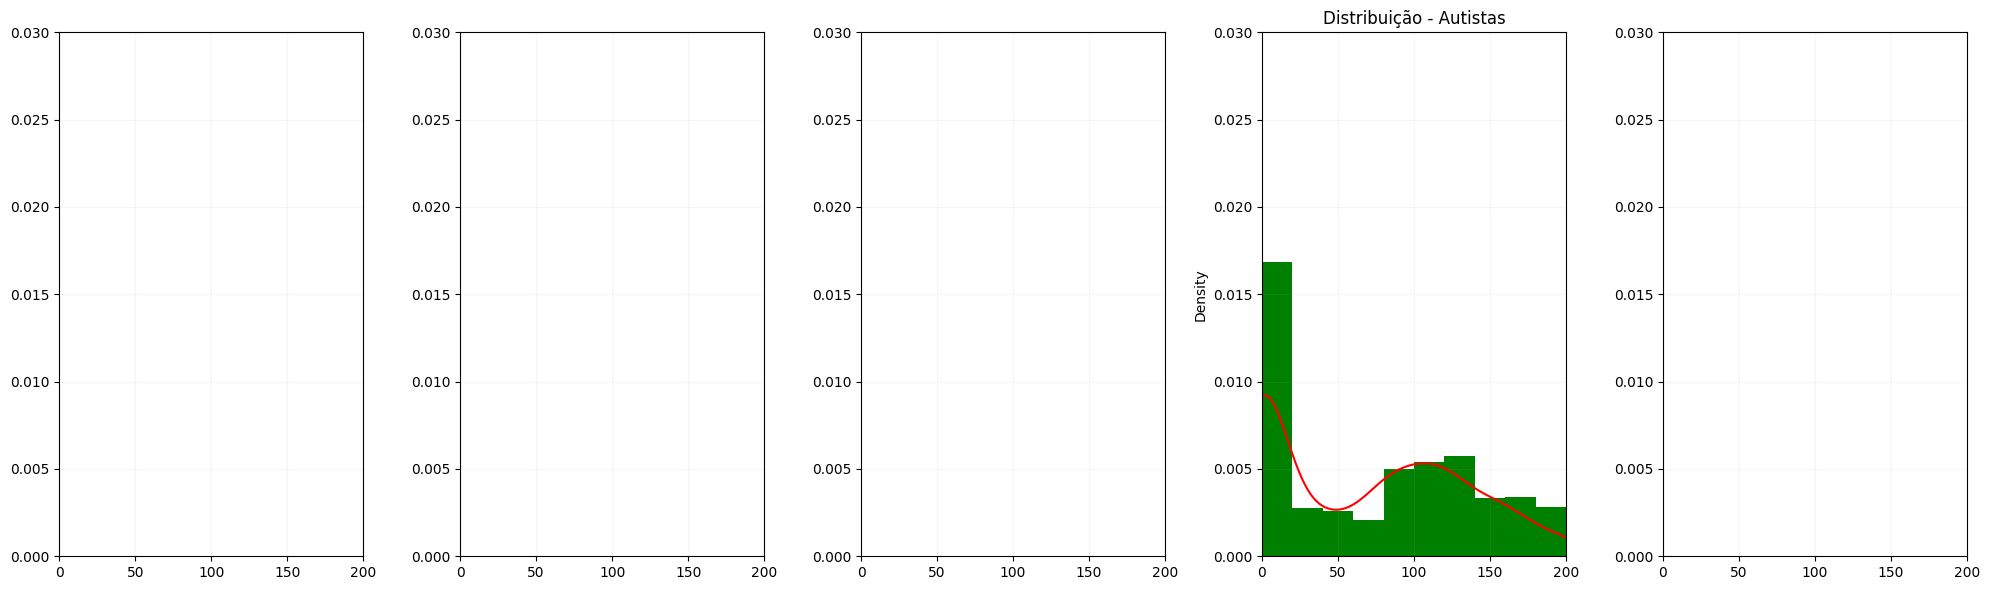

A assimetria do grupo com Autistas é: 0.30070180188836587


In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(20, 6))

tot_deficit_atencao['NU_NOTA_COMP5'].plot(kind='hist', ax=axes[0],density=True, title='Distribuição - TDAH', color='blue')
kde_deficit_atencao = tot_deficit_atencao['NU_NOTA_COMP5'].plot(kind='kde', ax=axes[0], color='red', label='Deficit de Atenção')

tot_dislexia['NU_NOTA_COMP5'].plot(kind='hist', ax=axes[1],density=True, title='Distribuição - Dislexia', color='yellow')
kde_dislexia = tot_dislexia['NU_NOTA_COMP5'].plot(kind='kde', ax=axes[1], color='red', label='Dislexia')

tot_discalculia['NU_NOTA_COMP5'].plot(kind='hist', ax=axes[2],density=True, title='Distribuição - Discalculia', color='orange')
kde_discalculia = tot_discalculia['NU_NOTA_COMP5'].plot(kind='kde', ax=axes[2], color='red', label='Discalculia')

tot_aut['NU_NOTA_COMP5'].plot(kind='hist', ax=axes[3],density=True, title='Distribuição - Autistas', color='green')
kde_aut = tot_aut['NU_NOTA_COMP5'].plot(kind='kde', ax=axes[3], color='red', label='Autistas')

tot_def_men['NU_NOTA_COMP5'].plot(kind='hist', ax=axes[4],density=True, title='Distribuição - Deficientes Mentais', color='purple')
kde_aut = tot_def_men['NU_NOTA_COMP5'].plot(kind='kde', ax=axes[4], color='red', label='Deficientes Mentais')


for ax in axes:
    ax.set_xlim(0, 200)
    ax.set_ylim(0, 0.03)
    ax.grid(True, alpha=0.1)
plt.tight_layout()
plt.show()

print("\n")

print(f"A assimetria do grupo com Deficit de Atenção é: {tot_deficit_atencao['NU_NOTA_COMP5'].skew()}")
print(f"A assimetria do grupo com Dislexia é: {tot_dislexia['NU_NOTA_COMP5'].skew()}")
print(f"A assimetria do grupo com Discalculia é: {tot_discalculia['NU_NOTA_COMP5'].skew()}")
print(f"A assimetria do grupo com Autistas é: {tot_aut['NU_NOTA_COMP5'].skew()}")
print(f"A assimetria do grupo com Deficientes Mentais é: {tot_def_men['NU_NOTA_COMP5'].skew()}")


> Note que os autistas e deficientes mentais apresentam distribuição similar, com assimetria positiva, enquanto os outros apresentam assimetrias negativas. Isso significa que as notas dos autistas e deficientes mentais são mais baixas na competência 5 da redação, o que pode reforçar a ideia de que o autismo é um tipo de deficiência mental. Entretanto, os autistas possuem uma assimetria bem MENOR do que os deficientes mentais.

## Os autistas tem melhor desempenho em Matemática?

#### Verificando o desempenho dos alunos autistas nas 4 provas (com exceção de redação)
Vamos analisar algumas estatísticas descritivas que podem dar uma ideia de como é o desempenho dos grupos especiais.
Também vamos comparar o desempenho dos alunos autistas em matemática com relação ao desempenho dos mesmos na nota geral (LC, CH, Redação e CN)

In [ ]:
print(f"A nota média de Matemática dos autistas é {tot_aut['NU_NOTA_MT'].mean()}")
print(f"A nota média de Matemática dos deficientes mentais é {tot_def_men['NU_NOTA_MT'].mean()}")

print("----------------------------------------------------------------------------------------------------------")
print(f"A mediana de Matemática dos autistas é {tot_aut['NU_NOTA_MT'].median()}")
print(f"A mediana de Matemática dos deficientes mentais é {tot_def_men['NU_NOTA_MT'].median()}")
print("----------------------------------------------------------------------------------------------------------")
print(f"O DP de Matemática dos autistas é {tot_aut['NU_NOTA_MT'].std()}")
print(f"O DP de Matemática dos deficientes mentais é {tot_def_men['NU_NOTA_MT'].std()}")
print("----------------------------------------------------------------------------------------------------------")
print(f"A maior nota de Matemática dos autistas é {tot_aut['NU_NOTA_MT'].max()}")
print(f"A maior nota de Matemática dos deficientes mentais é {tot_def_men['NU_NOTA_MT'].max()}")

A nota média de Matemática dos autistas é 505.7653444676409
A nota média de Matemática dos deficientes mentais é 445.08630806845963
----------------------------------------------------------------------------------------------------------
A mediana de Matemática dos autistas é 472.15
A mediana de Matemática dos deficientes mentais é 427.7
----------------------------------------------------------------------------------------------------------
O DP de Matemática dos autistas é 115.62016511142537
O DP de Matemática dos deficientes mentais é 75.59271154493698
----------------------------------------------------------------------------------------------------------
A maior nota de Matemática dos autistas é 937.7
A maior nota de Matemática dos deficientes mentais é 918.1


- Autistas: Média (505.77) > Mediana (472.15) → Distribuição assimétrica à direita (cauda longa de notas altas).

- Deficientes mentais: Média (445.09) > Mediana (427.7) → Também assimétrica à direita, porém menos pronunciada.

> Em ambos os grupos, há indivíduos com notas muito acima da mediana, mas o efeito é mais forte entre autistas.

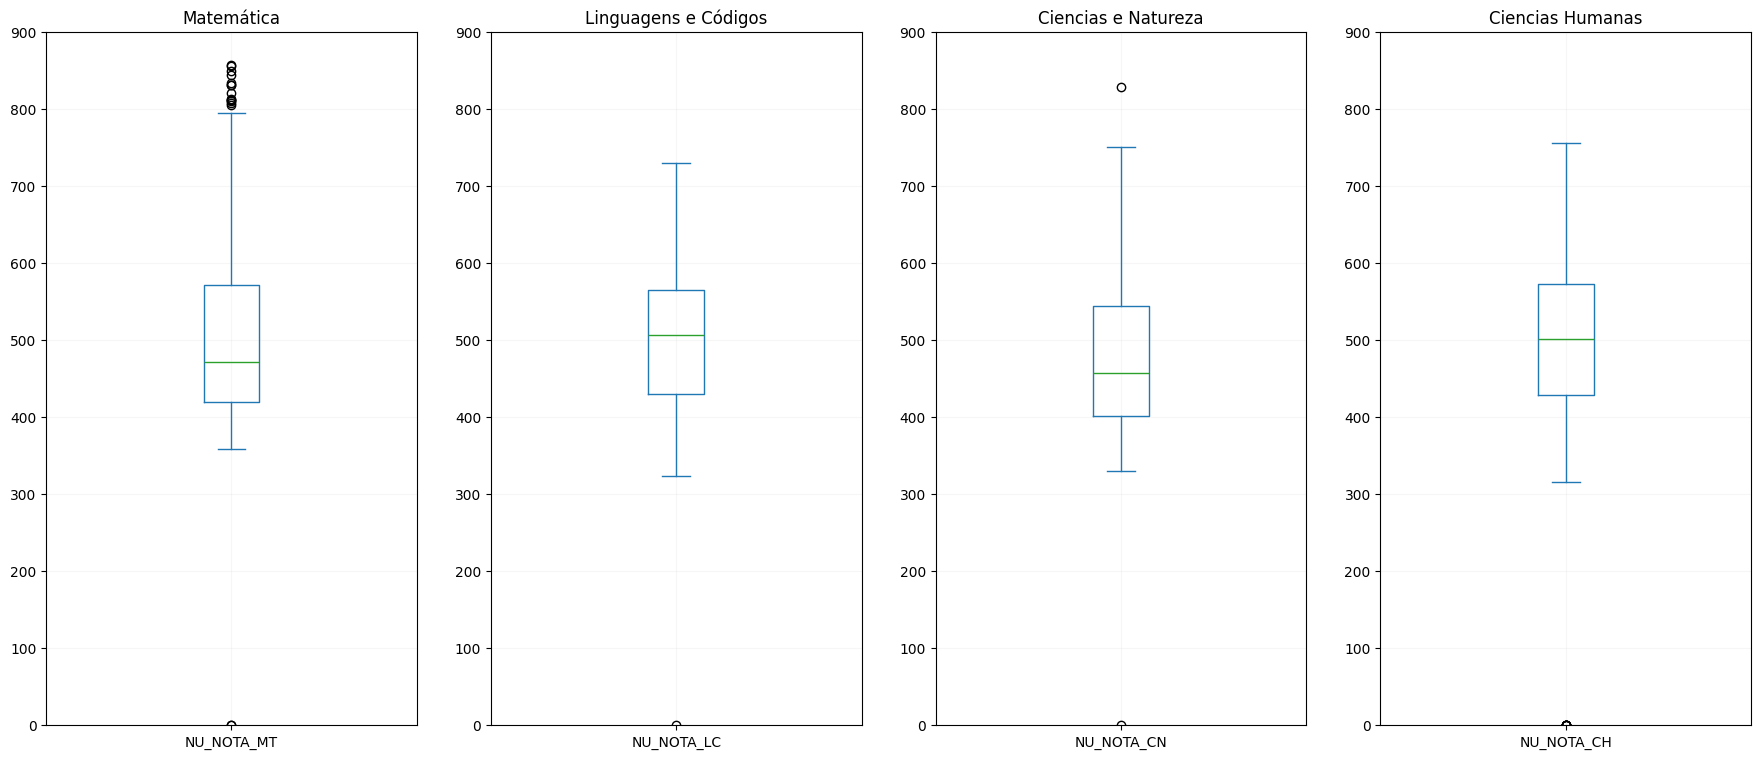

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(22, 9))
tot_aut['NU_NOTA_MT'].plot(kind='box', ax=axes[0], title='Matemática')
tot_aut['NU_NOTA_LC'].plot(kind='box', ax=axes[1], title='Linguagens e Códigos')
tot_aut['NU_NOTA_CN'].plot(kind='box', ax=axes[2], title='Ciencias e Natureza')
tot_aut['NU_NOTA_CH'].plot(kind='box', ax=axes[3], title='Ciencias Humanas')

for ax in axes:
    ax.set_ylim(0, 900)
    ax.grid(True, alpha=0.1)


> Podemos notar que, em matématica, existem muitos outliers superiores com nota acima de 800, embora a mediana esteja próximo de 500. Mas a mediana das outras notas também são bem próximas de 500. Mas apenas matemática e ciências da natureza possuem outliers superiores.

> É difícil tirar conclusões a partir da imagem, especialmente em relação à ciências da natureza, humanas e linguagens. Mas em matemática, existem muitos pontos discrepantes com notas bem elevadas, o que parece indicar a tendência de que alguns autistas possuem um excelente desempenho em matemática, o que não constata, no entanto, que a maioria deles são bons em matemática, apenas que existe uma propensão á excelência na disciplina.

In [ ]:
# Criando variável que retorna a nota, excetuando-se a nota de matemática

tot_aut['NotaGeralSemMT'] = (tot_aut['NU_NOTA_CN'] + tot_aut['NU_NOTA_CH'] + tot_aut['NU_NOTA_LC'] + tot_aut['NU_NOTA_REDACAO']) / 4


Fazendo um teste de hipóteses com o teste T pareado (já que existe dependência entre as amostras) para verificar o desempenho do aluno em matemática comparado com seu desempenho na prova geral sem matemática, podemos ver se a diferença é estatísticamente significativa

Antes verificamos a condição de normalidade com o teste shapiro-wilk.
- Os dados seguem uma distribuição normal (H0)

1. Se o p-valor é maior que 0.05, não rejeitamos a hipótese nula de que os dados são normais.
2. Se o p-valor é menor que 0.05, rejeitamos a hipótese nula de que os dados são normais.

In [ ]:
# Shapiro Wilk da DIFERENÇA entre os grupos, já que as amostras são dependentes

stats.shapiro(tot_aut['NU_NOTA_MT'] - tot_aut['NotaGeralSemMT'])

# O valor p > 0.05 indica que os dados podem ser considerados normais


ShapiroResult(statistic=0.997235127930485, pvalue=0.10062341569621336)

- Não existe diferença significativa entre as notas de matemática e as outras notas (H0)

1. Se o p-valor é maior que 0.05, não rejeitamos a hipótese nula
2. Se o p-valor é menor que 0.05, rejeitamos a hipótese nula

In [ ]:
stats.ttest_rel(tot_aut['NotaGeralSemMT'], tot_aut['NU_NOTA_MT'])

TtestResult(statistic=-7.060731310328852, pvalue=3.181373703072953e-12, df=957)

> Note que a diferença é estatisticamente significativa, já que o p-valor é bem menor que 0.05, e então rejeitamos H0 (que afirmava que não existia diferença significativa). Concluindo, isso confirma que os autistas possuem um desempenho estatisticamente diferente (e superior) em matemática do que nas outras disciplinas

## Há diferença entre homens autistas e mulheres autistas?

Note que existe um desbalanceamento entre as classes, havendo mais homens (772) do que mulheres (186). Dito isso, podemos usar Undersampling

In [ ]:
tot_aut['TP_SEXO'].value_counts(normalize=True).map(lambda x: f"{x*100:.2f}%").to_frame().reset_index()[['TP_SEXO', 'proportion']]
tab_m_f = tot_aut['TP_SEXO'].value_counts(normalize=True).map(lambda x: f"{x*100:.2f}%").to_frame().reset_index()[['TP_SEXO', 'proportion']]
tab_m_f['TP_SEXO'] = tab_m_f['TP_SEXO'].rename('Gênero')
tab_m_f['proportion'] = tab_m_f['proportion'].rename('Porcentagem')

In [ ]:
# Verificando a quantidade de dados para cada categoria
tab_m_f

,TP_SEXO,proportion
0,M,80.58%
1,F,19.42%


In [ ]:
size_sample = int(len(tot_aut[tot_aut['TP_SEXO'] == 'F'])/3)
size_sample

62

In [ ]:
# Criando a função que vai gerar o gráfico de regressão multinível

def gera_lmplot(sample):
    # Supondo que 'tot_aut' está definido externamente
    tot_aut_female = tot_aut[tot_aut['TP_SEXO'] == 'F'].sample(len(sample))
    male_female = pd.concat([sample, tot_aut_female])

    # Criar o gráfico com hue para sexo
    g = sns.lmplot(
        data=male_female,
        x='NU_IDADE',
        y='NotaEnem',
        hue='TP_SEXO',
        legend=False
    )
    plt.legend(title='Sexo', loc='lower right')

    # Calcular inclinações para cada grupo
    slopes = {}
    grupos = male_female.groupby('TP_SEXO')

    for nome, grupo in grupos:
        x = grupo['NU_IDADE'].values
        y = grupo['NotaEnem'].values
        slope = np.polyfit(x, y, 1)[0]  # Coeficiente angular (inclinação)
        slopes[nome] = slope

    print(f"Inclinações: {slopes}")
    return g.figure

Inclinações: {'F': -0.5427983317637588, 'M': -5.0309188562596505}
Inclinações: {'F': 2.533724439948955, 'M': 0.4020913434468448}
Inclinações: {'F': 1.0603962262823525, 'M': 3.918541239800681}
Inclinações: {'F': -0.22642140341456307, 'M': -1.544429276096528}
Inclinações: {'F': 2.2197179696769984, 'M': -9.228802487170837}
Inclinações: {'F': 3.134625787418821, 'M': 1.3242796939834154}
Inclinações: {'F': 2.797161669210659, 'M': -2.786753973724339}
Inclinações: {'F': -3.0441138211382235, 'M': -5.132648552301607}
Inclinações: {'F': 1.7549158961361917, 'M': 2.6287117597530174}
Inclinações: {'F': -3.1681479973606947, 'M': -6.995901570048306}


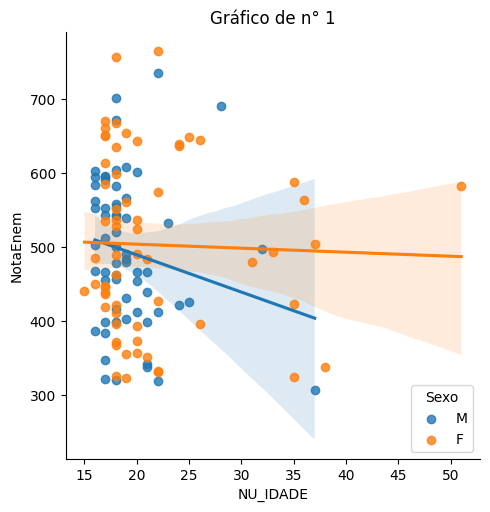

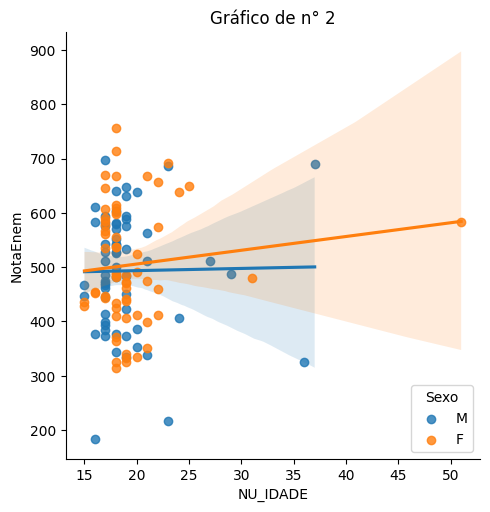

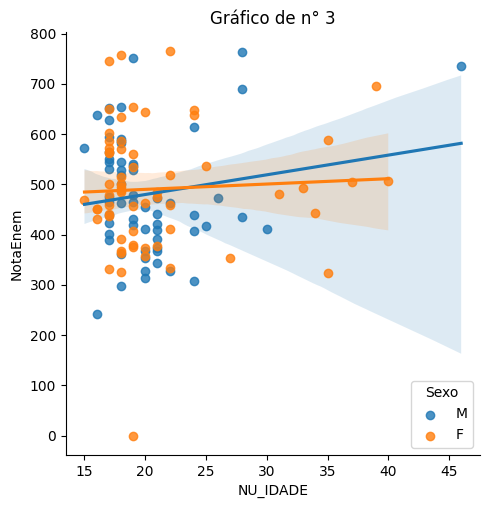

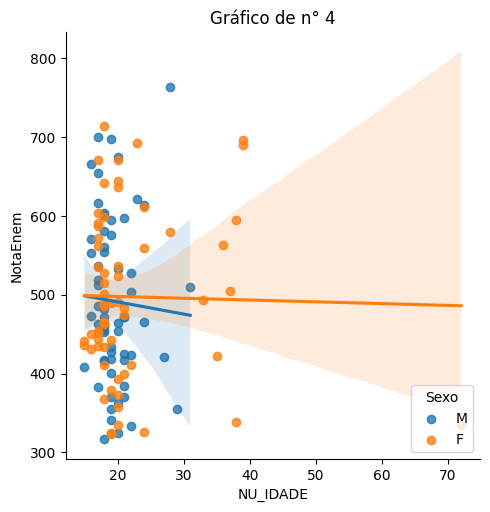

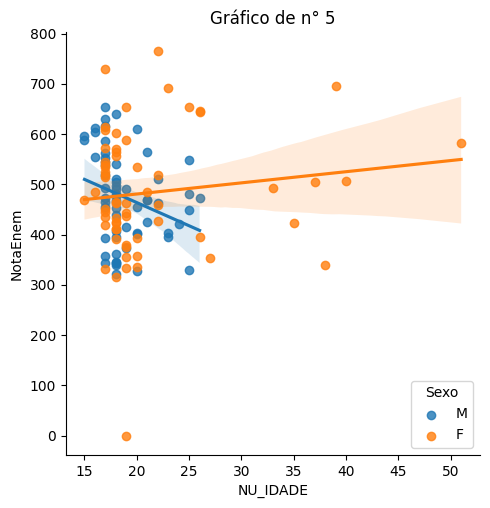

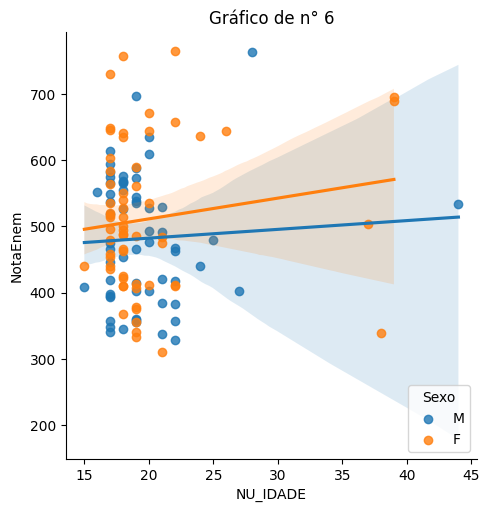

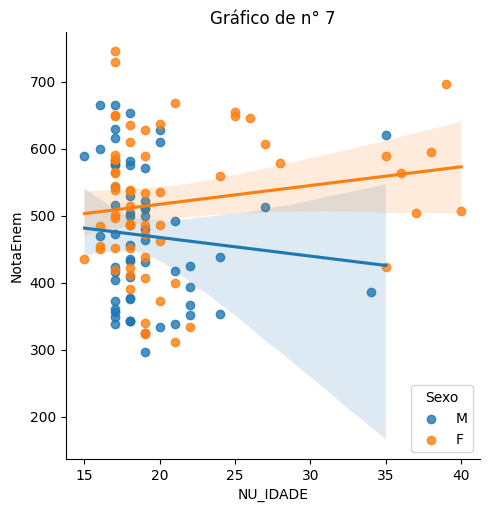

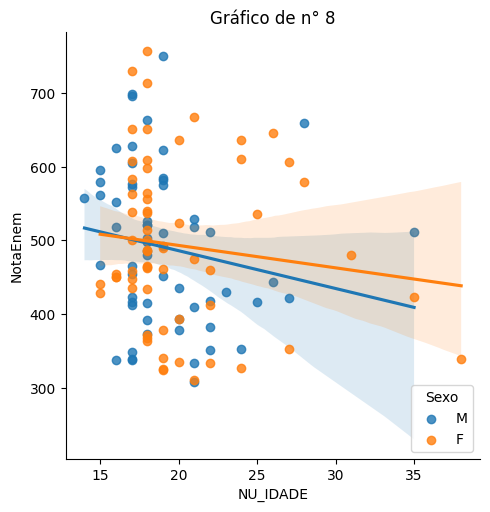

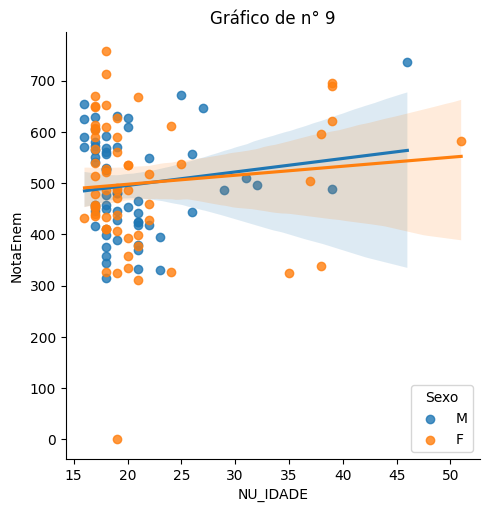

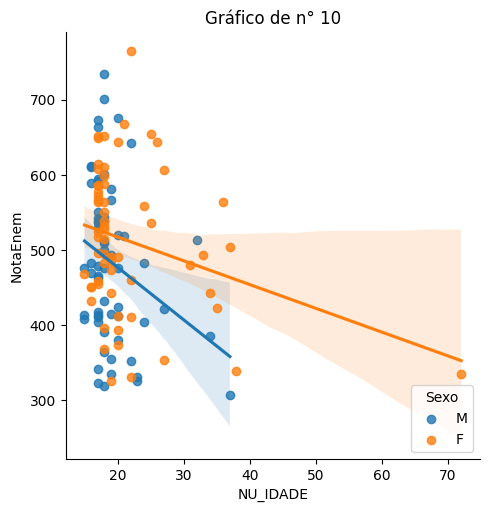

In [ ]:
# Iterando 10 vezes para gerar os gráficos

for i in range(0,10):
    tot_aut_sample_male = tot_aut[tot_aut['TP_SEXO'] == 'M'].sample(n=size_sample)
    gera_lmplot(tot_aut_sample_male)
    plt.title(f"Gráfico de n° {i+1}")

> Notamos que que existe uma clara tendência, na maioria dos samples coletados, de que as notas dos homens diminuem com a idade. Por outro lado, a nota das mulheres é mais estável. A inclinação dos dados de mulheres é bem maior do que a dos homens na maioria dos "duelos"

## Quais fatores mais influenciam as notas dos autistas?
Podemos usar algumas abordagens para descobrir quais variáveis impactam no desempenho.

Podemos testar o feature importance, da biblioteca de Floresta Aleatória para ver quais fatores mais influenciam as notas dos autistas, em porcentagem. É certo que esse é um recurso voltado para Machine Learning, mas é uma boa forma de ver quais fatores mais influenciam o desempenho dos alunos.

Geralmente, a importância da árvore fornece uma pontuação que indica o quão útil ou valioso cada variável foi na construção das árvores de decisão impulsionadas dentro do modelo. Quanto mais um atributo é usado para tomar decisões importantes com árvores de decisão, maior sua importância relativa.

In [ ]:
# Codificando algumas variáveis para o modelo
tot_aut.loc[:, 'Sexo_codificado'] = tot_aut['TP_SEXO'].map({'F': 0, 'M': 1})

tot_aut.loc[:, 'Renda_codificada'] = tot_aut['Renda'].map({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4,
                                                           'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9,
                                                           'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14,
                                                            'P': 15, 'Q': 16})

tot_aut.loc[:, 'Escolaridade Pai codificada'] = tot_aut['Escolaridade Pai'].map({'A': 0, 'B': 1, 'C': 2,
                                                                                 'D': 3, 'E': 4, 'F': 5,
                                                                                 'G': 6, 'H': 7})

tot_aut.loc[:, 'Internet codificada'] = tot_aut['Internet'].map({'S': 1, 'N': 0})


In [ ]:
# Escolhendo algumas colunas para o modelo

X = tot_aut[['Sexo_codificado', 'TP_ESCOLA', 'Renda_codificada', 'Escolaridade Pai codificada', 'Internet codificada', 'NU_IDADE']]
y = tot_aut['NotaEnem']

In [ ]:
# Dividir dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar modelo
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=6)
modelo_rf.fit(X_train, y_train)

# Extrair importância das features
importancias = pd.DataFrame({
    'Feature': X.columns,
    'Importance (%)': modelo_rf.feature_importances_ * 100
}).sort_values(by='Importance (%)', ascending=False)

importancias['% Acumulado'] = importancias['Importance (%)'].cumsum()
importancias

,Feature,Importance (%),% Acumulado
2,Renda_codificada,33.536251,33.536251
5,NU_IDADE,27.920696,61.456947
3,Escolaridade Pai codificada,20.446611,81.903557
1,TP_ESCOLA,8.691365,90.594923
0,Sexo_codificado,6.028814,96.623737
4,Internet codificada,3.376263,100.000000


> Usando uma análise com o cálculo de importância de variáveis, do módulo de machine learning do scikit-learn, foi possível identificar que as variáveis mais importantes para um modelo de previsão, o que consideraremos também como as variáveis mais relevantes para a nossa análise, são:
> - Renda
>- Idade
>- Escolaridade do Pai

### Usando a biblioteca SHAP
O SHAP é baseado na teoria dos jogos (SHapley Additive exPlanations). Ele é um método para também entender o impacto de cada variável para um modelo, mas podemos usa-lo de forma explicativa em vez de preditiva. Ela tenta explicar a importância de cada variável em um cenário de permutações, considerando o impacto de cada variável em contextos diferentes

In [ ]:
# Criar objeto explicador SHAP
explainer = shap.TreeExplainer(modelo_rf, X_train)
# Calcular valores SHAP para os dados de teste
shap_values = explainer(X_test)


 93%|=================== | 179/192 [00:11<00:00]       

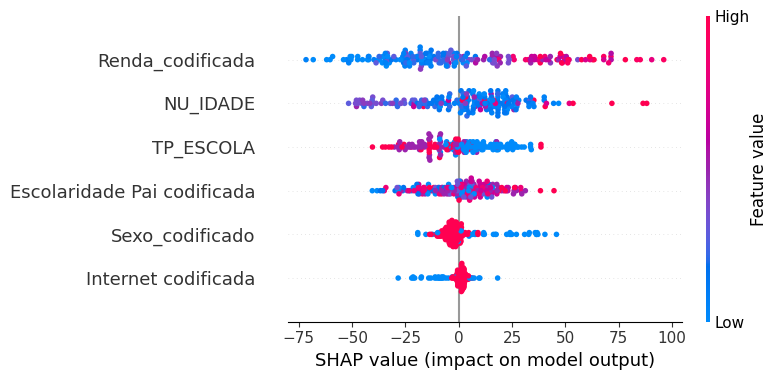

In [ ]:
shap.summary_plot(shap_values, X_test)

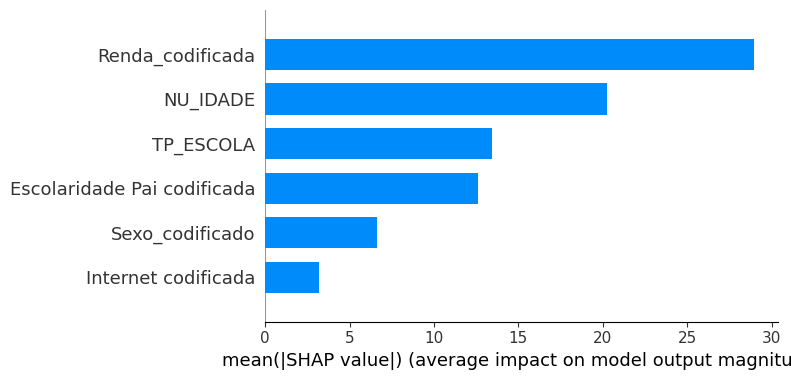

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [ ]:
# Cria um outro modelo (linear)

modelo_rl = LinearRegression()
modelo_rl.fit(X_train, y_train)

LinearRegression()

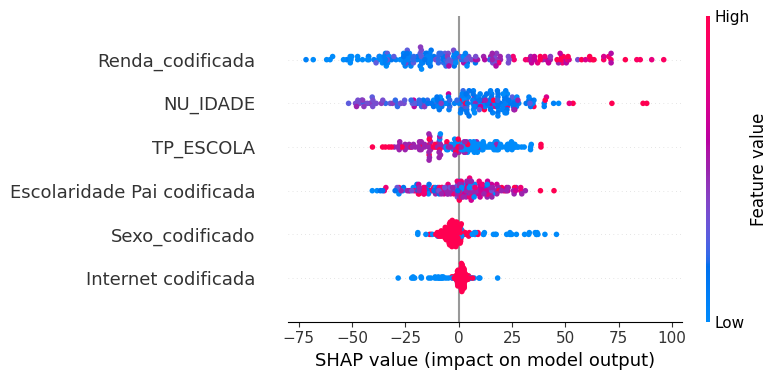

In [ ]:
# Criar objeto explicador SHAP
explainer_rl = shap.Explainer(modelo_rl, X_train)

# Calcular valores SHAP para os dados de teste
shap_values_rl = explainer(X_test)

shap.summary_plot(shap_values_rl, X_test)

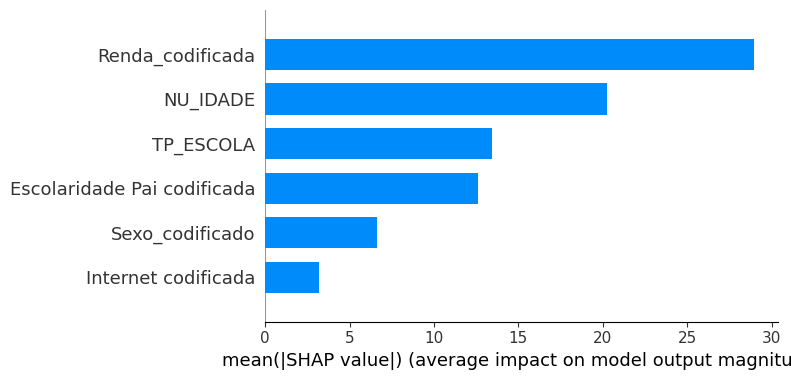

In [ ]:
shap.summary_plot(shap_values_rl, X_test, plot_type="bar")

> Note que, há apenas uma alteração em comparação ao feature importance do Random Forest. No SHAP, para os dois modelos, a variável TP_ESCOLA (Tipo de Escola) impacta mais do que a escolaridade do pai